In [ ]:
 
!pip install jovian --upgrade -q
import jovian
jovian.set_project('course-project')
jovian.set_colab_id('1uxKq2Ti5kTWZ36GVijK2wsLRzTCSYUBx')

# Course Project

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="course project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/obasidanchi01/course-project


'https://jovian.ai/obasidanchi01/course-project'

We shall Begin with the installation of the libraries we need for this project



In [ ]:
!pip install numpy pandas matplotlib seaborn --quiet

In [ ]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

     |████████████████████████████████| 166.7 MB 14 kB/s 
     |████████████████████████████████| 2.0 MB 32.7 MB/s 
     |████████████████████████████████| 22.3 MB 73.9 MB/s 


In [ ]:
import opendatasets as od
import  plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (15, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#DON'T GET KICKED
> One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

>Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.https://www.kaggle.com/c/DontGetKicked/overview.

>Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

>The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).

> This is the above description of the problem statment, and we to give a good, if not an absolute prediction to used car traders, on how to detect a 'ISBADBUY'.

#Downloading the Data set from Kaggle

In [ ]:
od.download('https://www.kaggle.com/c/DontGetKicked/overview')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: obasichijiokedeclan
Your Kaggle Key: ··········


100%|██████████| 10.2M/10.2M [00:00<00:00, 82.4MB/s]


Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


In [ ]:
car_df = pd.read_csv('/content/DontGetKicked/training.csv', low_memory= False)
test_df = pd.read_csv('/content/DontGetKicked/test.csv')
submission_df = pd.read_csv('/content/DontGetKicked/example_entry.csv')

In [ ]:
car_df

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0  12/7/2009   ADESA     2006           3      MAZDA   
1          2         0  12/7/2009   ADESA     2004           5      DODGE   
2          3         0  12/7/2009   ADESA     2005           4      DODGE   
3          4         0  12/7/2009   ADESA     2004           5      DODGE   
4          5         0  12/7/2009   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72978  73010         1  12/2/2009   ADESA     2001           8    MERCURY   
72979  73011         0  12/2/2009   ADESA     2007           2  CHEVROLET   
72980  73012         0  12/2/2009   ADESA     2005           4       JEEP   
72981  73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
72982  73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  \
0                    MAZDA3    i         4D SEDAN I     RED         AUTO   
1       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO   
2                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO   
3                      NEON  SXT           4D SEDAN  SILVER         AUTO   
4                     FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL   
...                     ...  ...                ...     ...          ...   
72978                 SABLE   GS        4D SEDAN GS   BLACK         AUTO   
72979             MALIBU 4C   LS        4D SEDAN LS  SILVER         AUTO   
72980  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER         AUTO   
72981                IMPALA   LS        4D SEDAN LS   WHITE         AUTO   
72982                MAZDA6    s         4D SEDAN S  SILVER         AUTO   

       WheelTypeID WheelType  VehOdo  Nationality         Size  \
0              1.0     Alloy   89046  OTHER ASIAN       MEDIUM   
1              1.0     Alloy   93593     AMERICAN  LARGE TRUCK   
2              2.0    Covers   73807     AMERICAN       MEDIUM   
3              1.0     Alloy   65617     AMERICAN      COMPACT   
4              2.0    Covers   69367     AMERICAN      COMPACT   
...            ...       ...     ...          ...          ...   
72978          1.0     Alloy   45234     AMERICAN       MEDIUM   
72979          NaN       NaN   71759     AMERICAN       MEDIUM   
72980          1.0     Alloy   88500     AMERICAN   MEDIUM SUV   
72981          1.0     Alloy   79554     AMERICAN        LARGE   
72982          1.0     Alloy   66855  OTHER ASIAN       MEDIUM   

      TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
0                    OTHER                             8155.0   
1                 CHRYSLER                             6854.0   
2                 CHRYSLER                             3202.0   
3                 CHRYSLER                             1893.0   
4                     FORD                             3913.0   
...                    ...                                ...   
72978                 FORD                             1996.0   
72979                   GM                             6418.0   
72980             CHRYSLER                             8545.0   
72981                   GM                             6420.0   
72982                OTHER                             7535.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                               9829.0                           11636.0   
1                               8383.0                           10897.0   
2                               4760.0                            6943.0   
3                               2675.0                            4658.0   
4                               5054.0                            7723.0   
...                                ...                               ...   
72978                           2993.0                         

In [ ]:
test_df

RefId   PurchDate  Auction  VehYear  VehicleAge       Make  \
0       73015   12/2/2009    ADESA     2005           4    PONTIAC   
1       73016   12/2/2009    ADESA     2005           4  CHEVROLET   
2       73017   12/2/2009    ADESA     2006           3      DODGE   
3       73018   12/2/2009    ADESA     2002           7     SATURN   
4       73019   12/2/2009    ADESA     2007           2    HYUNDAI   
...       ...         ...      ...      ...         ...        ...   
48702  121742  11/17/2010  MANHEIM     2005           5       FORD   
48703  121743  11/17/2010  MANHEIM     2007           3     TOYOTA   
48704  121744  11/17/2010  MANHEIM     2006           4        KIA   
48705  121745  11/17/2010  MANHEIM     2005           5      MAZDA   
48706  121746  11/17/2010  MANHEIM     2003           7      BUICK   

                Model Trim                SubModel   Color Transmission  \
0          GRAND PRIX  Bas                4D SEDAN  SILVER         AUTO   
1           MALIBU V6   LS             4D SEDAN LS  SILVER         AUTO   
2      DURANGO 2WD V8  Adv  4D SUV 4.7L ADVENTURER  SILVER         AUTO   
3            L SERIES  L20           4D SEDAN L200    GOLD         AUTO   
4              ACCENT   GS             2D COUPE GS    BLUE         AUTO   
...               ...  ...                     ...     ...          ...   
48702    FIVE HUNDRED  SEL            4D SEDAN SEL   BLACK         AUTO   
48703         COROLLA   CE             4D SEDAN CE   GREEN         AUTO   
48704         SPECTRA   EX             4D SEDAN EX   BLACK         AUTO   
48705          MAZDA3    s             4D SEDAN GT  SILVER         AUTO   
48706  RENDEZVOUS AWD   CX               4D SUV CX    GOLD         AUTO   

       WheelTypeID WheelType  VehOdo     Nationality        Size  \
0              1.0     Alloy   85377        AMERICAN       LARGE   
1              1.0     Alloy   61873        AMERICAN      MEDIUM   
2              1.0     Alloy   69283        AMERICAN  MEDIUM SUV   
3              1.0     Alloy   87889        AMERICAN      MEDIUM   
4              NaN       NaN   73432     OTHER ASIAN     COMPACT   
...            ...       ...     ...             ...         ...   
48702          1.0     Alloy   88645        AMERICAN       LARGE   
48703          2.0    Covers   81862  TOP LINE ASIAN     COMPACT   
48704          2.0    Covers   82451     OTHER ASIAN      MEDIUM   
48705          1.0     Alloy   75760     OTHER ASIAN      MEDIUM   
48706          2.0    Covers   82174        AMERICAN  MEDIUM SUV   

      TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
0                       GM                             5032.0   
1                       GM                             4502.0   
2                 CHRYSLER                            10244.0   
3                       GM                             2558.0   
4                    OTHER                             5013.0   
...                    ...                                ...   
48702                 FORD                             5358.0   
48703                OTHER                             6849.0   
48704                OTHER                             4662.0   
48705                OTHER                             5953.0   
48706                   GM                             3269.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                               6386.0                            5935.0   
1                               5685.0                            5362.0   
2                              13041.0                           11564.0   
3                               3542.0                            3263.0   
4                               6343.0                            5914.0   
...                                ...                               ...   
48702                           6836.0                            8987.0   
48703                           7992.0                      

In [ ]:
submission_df

RefId  IsBadBuy
0       73015         0
1       73016         0
2       73017         0
3       73018         0
4       73019         0
...       ...       ...
48702  121742         0
48703  121743         0
48704  121744         0
48705  121745         0
48706  121746         0

[48707 rows x 2 columns]

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/obasidanchi01/course-project


'https://jovian.ai/obasidanchi01/course-project'

#Preparing, EDA and Feature Engineering

Now we are going to be looking at some column and how important they are going to be in this analysis. also perform some feature enginerring,data cleaning and many more.

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [ ]:
car_df.describe()

RefId      IsBadBuy       VehYear    VehicleAge   WheelTypeID  \
count  72983.000000  72983.000000  72983.000000  72983.000000  69814.000000   
mean   36511.428497      0.122988   2005.343052      4.176644      1.494299   
std    21077.241302      0.328425      1.731252      1.712210      0.521290   
min        1.000000      0.000000   2001.000000      0.000000      0.000000   
25%    18257.500000      0.000000   2004.000000      3.000000      1.000000   
50%    36514.000000      0.000000   2005.000000      4.000000      1.000000   
75%    54764.500000      0.000000   2007.000000      5.000000      2.000000   
max    73014.000000      1.000000   2010.000000      9.000000      3.000000   

              VehOdo  MMRAcquisitionAuctionAveragePrice  \
count   72983.000000                       72965.000000   
mean    71499.995917                        6128.909217   
std     14578.913128                        2461.992768   
min      4825.000000                           0.000000   
25%     61837.000000                        4273.000000   
50%     73361.000000                        6097.000000   
75%     82436.000000                        7765.000000   
max    115717.000000                       35722.000000   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
count                     72965.000000                      72965.000000   
mean                       7373.636031                       8497.034332   
std                        2722.491986                       3156.285284   
min                           0.000000                          0.000000   
25%                        5406.000000                       6280.000000   
50%                        7303.000000                       8444.000000   
75%                        9021.000000                      10651.000000   
max                       36859.000000                      39080.000000   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
count                   72965.000000                   72668.000000   
mean                     9850.928240                    6132.081287   
std                      3385.789541                    2434.567723   
min                         0.000000                       0.000000   
25%                      7493.000000                    4275.000000   
50%                      9789.000000                    6062.000000   
75%                     12088.000000                    7736.000000   
max                     41482.000000                   35722.000000   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
count                 72668.000000                  72668.000000   
mean                   7390.681827                   8775.723331   
std                    2686.248852                   3090.702941   
min                       0.000000                      0.000000   
25%                    5414.000000                   6536.000000   
50%                    7313.000000                   8729.000000   
75%                    9013.000000                  10911.000000   
max                   36859.000000                  39080.000000   

       MMRCurrentRetailCleanPrice         BYRNO        VNZIP1      VehBCost  \
count                72668.000000  72983.000000  72983.000000  72983.000000   
mean                 10145.385314  26345.842155  58043.059945   6730.934326   
std                   3310.254351  25717.351219  26151.640415   1767.846435   
min                      0.000000    835.000000   2764.000000      1.000000   
25%                   7784.000000  17212.000000  32124.000000   5435.000000   
50%                  10103.000000  19662.000000  73108.000000   6700.000000   
75%                  12309.000000  22808.000000  80022.000000   7900.000000   
max                  41062.000000  99761.000000  99224.000000  45469.000000   

       IsOnlineSale  WarrantyCost  
count  72983.000000  72983.000000  
mean       0.025280   1276.580985  
std        0

In [ ]:
car_df

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0  12/7/2009   ADESA     2006           3      MAZDA   
1          2         0  12/7/2009   ADESA     2004           5      DODGE   
2          3         0  12/7/2009   ADESA     2005           4      DODGE   
3          4         0  12/7/2009   ADESA     2004           5      DODGE   
4          5         0  12/7/2009   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72978  73010         1  12/2/2009   ADESA     2001           8    MERCURY   
72979  73011         0  12/2/2009   ADESA     2007           2  CHEVROLET   
72980  73012         0  12/2/2009   ADESA     2005           4       JEEP   
72981  73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
72982  73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  \
0                    MAZDA3    i         4D SEDAN I     RED         AUTO   
1       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO   
2                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO   
3                      NEON  SXT           4D SEDAN  SILVER         AUTO   
4                     FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL   
...                     ...  ...                ...     ...          ...   
72978                 SABLE   GS        4D SEDAN GS   BLACK         AUTO   
72979             MALIBU 4C   LS        4D SEDAN LS  SILVER         AUTO   
72980  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER         AUTO   
72981                IMPALA   LS        4D SEDAN LS   WHITE         AUTO   
72982                MAZDA6    s         4D SEDAN S  SILVER         AUTO   

       WheelTypeID WheelType  VehOdo  Nationality         Size  \
0              1.0     Alloy   89046  OTHER ASIAN       MEDIUM   
1              1.0     Alloy   93593     AMERICAN  LARGE TRUCK   
2              2.0    Covers   73807     AMERICAN       MEDIUM   
3              1.0     Alloy   65617     AMERICAN      COMPACT   
4              2.0    Covers   69367     AMERICAN      COMPACT   
...            ...       ...     ...          ...          ...   
72978          1.0     Alloy   45234     AMERICAN       MEDIUM   
72979          NaN       NaN   71759     AMERICAN       MEDIUM   
72980          1.0     Alloy   88500     AMERICAN   MEDIUM SUV   
72981          1.0     Alloy   79554     AMERICAN        LARGE   
72982          1.0     Alloy   66855  OTHER ASIAN       MEDIUM   

      TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
0                    OTHER                             8155.0   
1                 CHRYSLER                             6854.0   
2                 CHRYSLER                             3202.0   
3                 CHRYSLER                             1893.0   
4                     FORD                             3913.0   
...                    ...                                ...   
72978                 FORD                             1996.0   
72979                   GM                             6418.0   
72980             CHRYSLER                             8545.0   
72981                   GM                             6420.0   
72982                OTHER                             7535.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                               9829.0                           11636.0   
1                               8383.0                           10897.0   
2                               4760.0                            6943.0   
3                               2675.0                            4658.0   
4                               5054.0                            7723.0   
...                                ...                               ...   
72978                           2993.0                         

#EXPLANATORY DATA ANALYSIS (EDA) 

In [ ]:
px.histogram(car_df, x='Make', title='make', color='IsBadBuy')

> From the chart above, it is clearly seen that the relationship between the car make and the IsBadBuy seems to be one of a key factor in determining the auction of a car. But, at this point it still not clear yet, so we need to dig further for other columns reletionship with the target columns.

In [ ]:
px.histogram(car_df, x='VehYear', title='VehYear', color='IsBadBuy')


>Also looking at the chart carefully, it is safe to say that this distribution seems like a normal distribution and more of the weight is located around the 2005 and 2006. So, the vehicle year which seems to be available was 2005 and 2006 year. this simply means that vehicle year other than these two year will be very rear to find in the auction market, and this may be as a result to either:

>  The price of these vehicles might be to outragous

> It may be these vehicle year, seems to do poorly in their performance.

> Also, it can be that vehicle year of 2005 and 2006, was really a bad sale for the the manufacturers due to poor construction designs, low customer expectations, and may more.

In [ ]:
px.histogram(car_df, x='SubModel', title='SubModel', color='IsBadBuy')

In [ ]:
px.histogram(car_df, x='Transmission', title='Transmission', color='IsBadBuy')

Wow, from the chart, the type of transmission gears that would be found if to purchase a car is actually AUTO, because this seems to carry about more than 95% of the data and barely 2% to 3% for Manual transmission. this simply means that (i) the Auto transmission gear seems to be more productive than the Manual Transimission. (ii) it could also be that the model, vehicle year , of a particular make will prefer to auction out auto transmission because it was easier to maintain, they had so much in stock, or the price was quite lower than that of Manual Transmission. 

In [ ]:
px.histogram(car_df, x='MMRAcquisitionAuctionCleanPrice', title='MMRAcquisitionAuctionCleanPrice', color='IsBadBuy')

this is as same as A Normal Distribution curve. it can be inferred that a car that is above average good condition stands around a current price of around 8k dollars. which is above the the minimum price of 2.5k dollars and a maximum price of 15kdollars. this means that to get a good vehicle in a condition above an average scale, a buyer will need at 8k dollars. this is fair price though. 

In [ ]:
fig=px.scatter(car_df, 
                 x='MMRAcquisitionAuctionAveragePrice', 
                 y='MMRAcquisitionAuctionCleanPrice', 
                 color='IsBadBuy', 
                 opacity=0.8, 
                 hover_data=['MMRAcquisitionAuctionAveragePrice'], 
                 title='MMRAcquisitionAuctionAveragePrice	 vs MMRAcquisitionAuctionCleanPrice')
fig.update_traces(marker_size=5)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
car_df[['MMRAcquisitionAuctionAveragePrice',	'MMRAcquisitionAuctionCleanPrice']]

MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice
0                                 8155.0                           9829.0
1                                 6854.0                           8383.0
2                                 3202.0                           4760.0
3                                 1893.0                           2675.0
4                                 3913.0                           5054.0
...                                  ...                              ...
72978                             1996.0                           2993.0
72979                             6418.0                           7325.0
72980                             8545.0                           9959.0
72981                             6420.0                           7604.0
72982                             7535.0                           8771.0

[72983 rows x 2 columns]

from the two columns above, the price differnce in the 	MMRAcquisitionAuctionCleanPrice and MMRAcquisitionAuctionAveragePrice is pretty much much like a 1000 dollars on an avearge scale. this seems means that we can create a column indicating a single price when the car is in proper condition. 

In [ ]:
car_df

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0  12/7/2009   ADESA     2006           3      MAZDA   
1          2         0  12/7/2009   ADESA     2004           5      DODGE   
2          3         0  12/7/2009   ADESA     2005           4      DODGE   
3          4         0  12/7/2009   ADESA     2004           5      DODGE   
4          5         0  12/7/2009   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72978  73010         1  12/2/2009   ADESA     2001           8    MERCURY   
72979  73011         0  12/2/2009   ADESA     2007           2  CHEVROLET   
72980  73012         0  12/2/2009   ADESA     2005           4       JEEP   
72981  73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
72982  73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel   Color Transmission  \
0                    MAZDA3    i         4D SEDAN I     RED         AUTO   
1       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO   
2                STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO   
3                      NEON  SXT           4D SEDAN  SILVER         AUTO   
4                     FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL   
...                     ...  ...                ...     ...          ...   
72978                 SABLE   GS        4D SEDAN GS   BLACK         AUTO   
72979             MALIBU 4C   LS        4D SEDAN LS  SILVER         AUTO   
72980  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  SILVER         AUTO   
72981                IMPALA   LS        4D SEDAN LS   WHITE         AUTO   
72982                MAZDA6    s         4D SEDAN S  SILVER         AUTO   

       WheelTypeID WheelType  VehOdo  Nationality         Size  \
0              1.0     Alloy   89046  OTHER ASIAN       MEDIUM   
1              1.0     Alloy   93593     AMERICAN  LARGE TRUCK   
2              2.0    Covers   73807     AMERICAN       MEDIUM   
3              1.0     Alloy   65617     AMERICAN      COMPACT   
4              2.0    Covers   69367     AMERICAN      COMPACT   
...            ...       ...     ...          ...          ...   
72978          1.0     Alloy   45234     AMERICAN       MEDIUM   
72979          NaN       NaN   71759     AMERICAN       MEDIUM   
72980          1.0     Alloy   88500     AMERICAN   MEDIUM SUV   
72981          1.0     Alloy   79554     AMERICAN        LARGE   
72982          1.0     Alloy   66855  OTHER ASIAN       MEDIUM   

      TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
0                    OTHER                             8155.0   
1                 CHRYSLER                             6854.0   
2                 CHRYSLER                             3202.0   
3                 CHRYSLER                             1893.0   
4                     FORD                             3913.0   
...                    ...                                ...   
72978                 FORD                             1996.0   
72979                   GM                             6418.0   
72980             CHRYSLER                             8545.0   
72981                   GM                             6420.0   
72982                OTHER                             7535.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                               9829.0                           11636.0   
1                               8383.0                           10897.0   
2                               4760.0                            6943.0   
3                               2675.0                            4658.0   
4                               5054.0                            7723.0   
...                                ...                               ...   
72978                           2993.0                         

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/obasidanchi01/course-project


'https://jovian.ai/obasidanchi01/course-project'

#Some Feature Engineering

THE AUCTIONS PRICE COLUMN

There seems to be no much difference in the average condition price and that of above average condition price. so a new column would be created by suming the two columns and returning their average values. this column would  be a base price when the car is in good conditions 

In [ ]:
car_df['auctionbaseprice'] = (
    car_df['MMRAcquisitionAuctionAveragePrice'] + car_df['MMRAcquisitionAuctionCleanPrice']
) / 2

test_df['auctionbaseprice'] = (
    test_df['MMRAcquisitionAuctionAveragePrice'] + test_df['MMRAcquisitionAuctionCleanPrice']
) / 2
 

In [ ]:
car_df['Retailbaseprice'] = (
    car_df['MMRAcquisitionRetailAveragePrice'] + car_df['MMRAcquisitonRetailCleanPrice']
) / 2

test_df['Retailbaseprice'] = (
    test_df['MMRAcquisitionRetailAveragePrice'] + test_df['MMRAcquisitonRetailCleanPrice']
) / 2

In [ ]:
car_df['Currentauctionbaseprice'] = (
    car_df['MMRCurrentAuctionAveragePrice'] + car_df['MMRCurrentAuctionCleanPrice'])/2

test_df['Currentauctionbaseprice'] = (
    test_df['MMRCurrentAuctionAveragePrice'] + test_df['MMRCurrentAuctionCleanPrice'])/2

In [ ]:
car_df['Currentretailbaseprice'] = (
    car_df['MMRCurrentRetailAveragePrice'] + car_df['MMRCurrentRetailCleanPrice']
)/2

test_df['Currentretailbaseprice'] = (
    test_df['MMRCurrentRetailAveragePrice'] + test_df['MMRCurrentRetailCleanPrice']
)/2

In [ ]:
car_df.columns


Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost',
       'auctionbaseprice', 'Retailbaseprice', 'Currentauctionbaseprice',
       'Currentretailbaseprice'],
      dtype='object')

In [ ]:
car_df.head(10)

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge        Make  \
0      1         0  12/7/2009   ADESA     2006           3       MAZDA   
1      2         0  12/7/2009   ADESA     2004           5       DODGE   
2      3         0  12/7/2009   ADESA     2005           4       DODGE   
3      4         0  12/7/2009   ADESA     2004           5       DODGE   
4      5         0  12/7/2009   ADESA     2005           4        FORD   
5      6         0  12/7/2009   ADESA     2004           5  MITSUBISHI   
6      7         0  12/7/2009   ADESA     2004           5         KIA   
7      8         0  12/7/2009   ADESA     2005           4        FORD   
8      9         0  12/7/2009   ADESA     2007           2         KIA   
9     10         0  12/7/2009   ADESA     2007           2        FORD   

                 Model Trim           SubModel   Color Transmission  \
0               MAZDA3    i         4D SEDAN I     RED         AUTO   
1  1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   WHITE         AUTO   
2           STRATUS V6  SXT   4D SEDAN SXT FFV  MAROON         AUTO   
3                 NEON  SXT           4D SEDAN  SILVER         AUTO   
4                FOCUS  ZX3       2D COUPE ZX3  SILVER       MANUAL   
5            GALANT 4C   ES        4D SEDAN ES   WHITE         AUTO   
6              SPECTRA   EX        4D SEDAN EX   BLACK         AUTO   
7               TAURUS   SE        4D SEDAN SE   WHITE         AUTO   
8              SPECTRA   EX        4D SEDAN EX   BLACK         AUTO   
9         FIVE HUNDRED  SEL       4D SEDAN SEL     RED         AUTO   

   WheelTypeID WheelType  VehOdo  Nationality         Size  \
0          1.0     Alloy   89046  OTHER ASIAN       MEDIUM   
1          1.0     Alloy   93593     AMERICAN  LARGE TRUCK   
2          2.0    Covers   73807     AMERICAN       MEDIUM   
3          1.0     Alloy   65617     AMERICAN      COMPACT   
4          2.0    Covers   69367     AMERICAN      COMPACT   
5          2.0    Covers   81054  OTHER ASIAN       MEDIUM   
6          2.0    Covers   65328  OTHER ASIAN       MEDIUM   
7          2.0    Covers   65805     AMERICAN       MEDIUM   
8          2.0    Covers   49921  OTHER ASIAN       MEDIUM   
9          1.0     Alloy   84872     AMERICAN        LARGE   

  TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
0                OTHER                             8155.0   
1             CHRYSLER                             6854.0   
2             CHRYSLER                             3202.0   
3             CHRYSLER                             1893.0   
4                 FORD                             3913.0   
5                OTHER                             3901.0   
6                OTHER                             2966.0   
7                 FORD                             3313.0   
8                OTHER                             6196.0   
9                 FORD                             7845.0   

   MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                           9829.0                           11636.0   
1                           8383.0                           10897.0   
2                           4760.0                            6943.0   
3                           2675.0                            4658.0   
4                           5054.0                            7723.0   
5                           4908.0                            6706.0   
6                           4038.0                            6240.0   
7                           4342.0                            6667.0   
8                           7274.0                            9687.0   
9                           9752.0                           11734.0   

   MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
0                        13600.0                         7451.0   
1                        12572.0                         7456.0   
2                         8457.0                         

In [ ]:
test_df.shape


(48707, 37)

In [ ]:
car_df.shape

(72983, 38)

WheelType

Looking at the dataframe, the wheelType column can be droped since the wheeltype Id is same and it is in the numeric already. 

In [ ]:
car_df.dropna(subset=['WheelType'], inplace=True)
test_df.dropna(subset=['WheelType'], inplace=True)
car_df

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0  12/7/2009   ADESA     2006           3      MAZDA   
1          2         0  12/7/2009   ADESA     2004           5      DODGE   
2          3         0  12/7/2009   ADESA     2005           4      DODGE   
3          4         0  12/7/2009   ADESA     2004           5      DODGE   
4          5         0  12/7/2009   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72977  73009         0  12/2/2009   ADESA     2006           3        KIA   
72978  73010         1  12/2/2009   ADESA     2001           8    MERCURY   
72980  73012         0  12/2/2009   ADESA     2005           4       JEEP   
72981  73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
72982  73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim             SubModel   Color Transmission  \
0                    MAZDA3    i           4D SEDAN I     RED         AUTO   
1       1500 RAM PICKUP 2WD   ST    QUAD CAB 4.7L SLT   WHITE         AUTO   
2                STRATUS V6  SXT     4D SEDAN SXT FFV  MAROON         AUTO   
3                      NEON  SXT             4D SEDAN  SILVER         AUTO   
4                     FOCUS  ZX3         2D COUPE ZX3  SILVER       MANUAL   
...                     ...  ...                  ...     ...          ...   
72977           SORENTO 2WD   EX  4D SPORT UTILITY EX    GOLD         AUTO   
72978                 SABLE   GS          4D SEDAN GS   BLACK         AUTO   
72980  GRAND CHEROKEE 2WD V  Lar      4D WAGON LAREDO  SILVER         AUTO   
72981                IMPALA   LS          4D SEDAN LS   WHITE         AUTO   
72982                MAZDA6    s           4D SEDAN S  SILVER         AUTO   

       WheelTypeID WheelType  VehOdo  Nationality         Size  \
0              1.0     Alloy   89046  OTHER ASIAN       MEDIUM   
1              1.0     Alloy   93593     AMERICAN  LARGE TRUCK   
2              2.0    Covers   73807     AMERICAN       MEDIUM   
3              1.0     Alloy   65617     AMERICAN      COMPACT   
4              2.0    Covers   69367     AMERICAN      COMPACT   
...            ...       ...     ...          ...          ...   
72977          1.0     Alloy   65399  OTHER ASIAN   MEDIUM SUV   
72978          1.0     Alloy   45234     AMERICAN       MEDIUM   
72980          1.0     Alloy   88500     AMERICAN   MEDIUM SUV   
72981          1.0     Alloy   79554     AMERICAN        LARGE   
72982          1.0     Alloy   66855  OTHER ASIAN       MEDIUM   

      TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
0                    OTHER                             8155.0   
1                 CHRYSLER                             6854.0   
2                 CHRYSLER                             3202.0   
3                 CHRYSLER                             1893.0   
4                     FORD                             3913.0   
...                    ...                                ...   
72977                OTHER                             7843.0   
72978                 FORD                             1996.0   
72980             CHRYSLER                             8545.0   
72981                   GM                             6420.0   
72982                OTHER                             7535.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                               9829.0                           11636.0   
1                               8383.0                           10897.0   
2                               4760.0                            6943.0   
3                               2675.0                            4658.0   
4                               5054.0                            7723.0   
...                                ...                               ...   
72977                           9171.0 

#SPLITING THE DATA SET INTO TRAIN AND VALIDATION SET

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(car_df, test_size=0.1, random_state=42)

In [ ]:
train_df

RefId  IsBadBuy   PurchDate  Auction  VehYear  VehicleAge       Make  \
16129  16140         0  10/27/2010    OTHER     2008           2  CHEVROLET   
6214    6221         0   3/25/2010  MANHEIM     2005           5        KIA   
61368  61398         0   7/14/2009  MANHEIM     2006           3    PONTIAC   
26595  26613         0   3/18/2009  MANHEIM     2004           5       FORD   
51772  51800         0   7/21/2010  MANHEIM     2003           7  CHEVROLET   
...      ...       ...         ...      ...      ...         ...        ...   
38790  38813         0   7/30/2009  MANHEIM     2005           4        KIA   
6558    6565         0    6/1/2010  MANHEIM     2002           8  CHEVROLET   
56979  57007         0   5/25/2010  MANHEIM     2009           1  CHEVROLET   
926      928         0  12/15/2009    ADESA     2006           3       FORD   
16576  16587         1    9/9/2009  MANHEIM     2003           6     SATURN   

                      Model Trim                 SubModel   Color  \
16129             IMPALA V6   LS     4D SEDAN LS 3.5L FFV   BEIGE   
6214                SPECTRA   SX              4D SEDAN EX     RED   
61368     G6 V6 3.5L V6 SFI  Bas                 4D SEDAN   WHITE   
26595  EXPEDITION 2WD V8 5.  Edd  4D SUV 5.4L EDDIE BAUER    BLUE   
51772  1500 SILVERADO PICKU  W/T             REG CAB 4.3L   WHITE   
...                     ...  ...                      ...     ...   
38790  SPECTRA 2.0L I-4 EFI   SX              4D SEDAN EX    BLUE   
6558     TRAILBLAZER 4WD 6C   LS           4D SUV 4.2L LS    GOLD   
56979             MALIBU 4C   LS              4D SEDAN LS  SILVER   
926            FIVE HUNDRED   SE              4D SEDAN SE  SILVER   
16576  ION 2.2L I-4 MPI DOH    3    2D QUAD COUPE LEVEL 3   BLACK   

      Transmission  WheelTypeID WheelType  VehOdo  Nationality         Size  \
16129         AUTO          2.0    Covers   76605     AMERICAN        LARGE   
6214          AUTO          1.0     Alloy   77732  OTHER ASIAN       MEDIUM   
61368         AUTO          1.0     Alloy   47812     AMERICAN       MEDIUM   
26595         AUTO          1.0     Alloy   78169     AMERICAN    LARGE SUV   
51772         AUTO          2.0    Covers   54598     AMERICAN  LARGE TRUCK   
...            ...          ...       ...     ...          ...          ...   
38790         AUTO          1.0     Alloy   52489  OTHER ASIAN       MEDIUM   
6558          AUTO          1.0     Alloy   81537     AMERICAN   MEDIUM SUV   
56979         AUTO          1.0     Alloy   89287     AMERICAN       MEDIUM   
926           AUTO          1.0     Alloy   89383     AMERICAN        LARGE   
16576         AUTO          1.0     Alloy   79042     AMERICAN       MEDIUM   

      TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
16129                   GM                             7804.0   
6214                 OTHER                             4355.0   
61368                   GM                             7371.0   
26595                 FORD                            10407.0   
51772                   GM                             4515.0   
...                    ...                                ...   
38790                OTHER                             3794.0   
6558                    GM                             4766.0   
56979                   GM                            11157.0   
926                   FORD                             5812.0   
16576                   GM                             3194.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
16129                           8697.0                           11998.0   
6214                            5403.0                            7467.0   
61368                           8631.0                            8461.0   
26595                          12034.0                           11740.0   
51772                           5922.0                            8134.0   
...                                ...     

In [ ]:
val_df

RefId  IsBadBuy   PurchDate  Auction  VehYear  VehicleAge       Make  \
33680  33702         0   12/1/2009  MANHEIM     2005           4  CHEVROLET   
29886  29907         0    4/7/2010  MANHEIM     2005           5     TOYOTA   
66524  66556         1   1/14/2010    ADESA     2004           6       JEEP   
40220  40243         0   8/27/2009  MANHEIM     2007           2     SUZUKI   
24735  24753         1   5/19/2010  MANHEIM     2002           8    PONTIAC   
...      ...       ...         ...      ...      ...         ...        ...   
34451  34474         0   5/25/2010  MANHEIM     2006           4  CHEVROLET   
64571  64602         0  10/27/2010    ADESA     2006           4      DODGE   
4087    4093         1    6/9/2010    OTHER     2005           5     NISSAN   
40041  40064         0   2/19/2009  MANHEIM     2006           3      DODGE   
67081  67113         0    2/4/2009    ADESA     2005           4  CHEVROLET   

                      Model Trim                SubModel   Color Transmission  \
33680       UPLANDER FWD V6   LS   PASSENGER EXT 3.5L LS    GOLD         AUTO   
29886               COROLLA   CE             4D SEDAN CE     RED         AUTO   
66524        LIBERTY 4WD V6  Spo                  4D SUV    BLUE         AUTO   
40220  RENO 2.0L I4 DI / EF  NaN                4D SEDAN  ORANGE       MANUAL   
24735           GRAND AM 4C   SE             2D COUPE SE  SILVER         AUTO   
...                     ...  ...                     ...     ...          ...   
34451                IMPALA   LT        4D SEDAN LT 3.5L  MAROON         AUTO   
64571        DURANGO 2WD V8  Adv  4D SUV 4.7L ADVENTURER  SILVER         AUTO   
4087                  QUEST    S              4D WAGON S   GREEN         AUTO   
40041  STRATUS 4C 2.4L I4 S  SXT                4D SEDAN  SILVER         AUTO   
67081      AVEO 1.6L I4 EFI   LS                4D SEDAN     RED         AUTO   

       WheelTypeID WheelType  VehOdo     Nationality        Size  \
33680          1.0     Alloy   77970        AMERICAN         VAN   
29886          2.0    Covers   86899  TOP LINE ASIAN     COMPACT   
66524          2.0    Covers   84954        AMERICAN   SMALL SUV   
40220          2.0    Covers   48179     OTHER ASIAN     COMPACT   
24735          2.0    Covers   73865        AMERICAN      MEDIUM   
...            ...       ...     ...             ...         ...   
34451          2.0    Covers   46531        AMERICAN       LARGE   
64571          1.0     Alloy   82988        AMERICAN  MEDIUM SUV   
4087           2.0    Covers   73107  TOP LINE ASIAN         VAN   
40041          1.0     Alloy   51754        AMERICAN      MEDIUM   
67081          2.0    Covers   53898        AMERICAN     COMPACT   

      TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
33680                   GM                             5840.0   
29886                OTHER                             5991.0   
66524             CHRYSLER                             6038.0   
40220                OTHER                             5261.0   
24735                   GM                             2523.0   
...                    ...                                ...   
34451                   GM                             7029.0   
64571             CHRYSLER                             9640.0   
4087                 OTHER                             7659.0   
40041             CHRYSLER                             4868.0   
67081                   GM                             3661.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
33680                           7169.0                            6807.0   
29886                           6997.0                            8953.0   
66524                           7451.0                            9883.0   
40220                           6434.0                            6182.0   
24735                           3508.0                            4628.0   
...                            

In [ ]:
test_df

RefId   PurchDate  Auction  VehYear  VehicleAge       Make  \
0       73015   12/2/2009    ADESA     2005           4    PONTIAC   
1       73016   12/2/2009    ADESA     2005           4  CHEVROLET   
2       73017   12/2/2009    ADESA     2006           3      DODGE   
3       73018   12/2/2009    ADESA     2002           7     SATURN   
5       73020   12/2/2009    ADESA     2006           3      DODGE   
...       ...         ...      ...      ...         ...        ...   
48702  121742  11/17/2010  MANHEIM     2005           5       FORD   
48703  121743  11/17/2010  MANHEIM     2007           3     TOYOTA   
48704  121744  11/17/2010  MANHEIM     2006           4        KIA   
48705  121745  11/17/2010  MANHEIM     2005           5      MAZDA   
48706  121746  11/17/2010  MANHEIM     2003           7      BUICK   

                Model Trim                SubModel   Color Transmission  \
0          GRAND PRIX  Bas                4D SEDAN  SILVER         AUTO   
1           MALIBU V6   LS             4D SEDAN LS  SILVER         AUTO   
2      DURANGO 2WD V8  Adv  4D SUV 4.7L ADVENTURER  SILVER         AUTO   
3            L SERIES  L20           4D SEDAN L200    GOLD         AUTO   
5          STRATUS 4C  SXT                4D SEDAN   GREEN         AUTO   
...               ...  ...                     ...     ...          ...   
48702    FIVE HUNDRED  SEL            4D SEDAN SEL   BLACK         AUTO   
48703         COROLLA   CE             4D SEDAN CE   GREEN         AUTO   
48704         SPECTRA   EX             4D SEDAN EX   BLACK         AUTO   
48705          MAZDA3    s             4D SEDAN GT  SILVER         AUTO   
48706  RENDEZVOUS AWD   CX               4D SUV CX    GOLD         AUTO   

       WheelTypeID WheelType  VehOdo     Nationality        Size  \
0              1.0     Alloy   85377        AMERICAN       LARGE   
1              1.0     Alloy   61873        AMERICAN      MEDIUM   
2              1.0     Alloy   69283        AMERICAN  MEDIUM SUV   
3              1.0     Alloy   87889        AMERICAN      MEDIUM   
5              1.0     Alloy   91059        AMERICAN      MEDIUM   
...            ...       ...     ...             ...         ...   
48702          1.0     Alloy   88645        AMERICAN       LARGE   
48703          2.0    Covers   81862  TOP LINE ASIAN     COMPACT   
48704          2.0    Covers   82451     OTHER ASIAN      MEDIUM   
48705          1.0     Alloy   75760     OTHER ASIAN      MEDIUM   
48706          2.0    Covers   82174        AMERICAN  MEDIUM SUV   

      TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
0                       GM                             5032.0   
1                       GM                             4502.0   
2                 CHRYSLER                            10244.0   
3                       GM                             2558.0   
5                 CHRYSLER                             4350.0   
...                    ...                                ...   
48702                 FORD                             5358.0   
48703                OTHER                             6849.0   
48704                OTHER                             4662.0   
48705                OTHER                             5953.0   
48706                   GM                             3269.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                               6386.0                            5935.0   
1                               5685.0                            5362.0   
2                              13041.0                           11564.0   
3                               3542.0                            3263.0   
5                               5313.0                            5198.0   
...                                ...                               ...   
48702                           6836.0                            8987.0   
48703                           7992.0                      

#Input and Target Columns

In [ ]:
input_cols = ['RefId', 	'Auction', 	'VehYear','VehicleAge',	'Make', 	'Model',	'WheelTypeID','VehOdo',	'Nationality',	'PRIMEUNIT',	'VNST',	'VehBCost',	'IsOnlineSale',	'WarrantyCost', 'auctionbaseprice',	'Retailbaseprice',	'Currentauctionbaseprice',	'Currentretailbaseprice']

In [ ]:
target_col= "IsBadBuy"

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
train_inputs


RefId  Auction  VehYear  VehicleAge       Make                 Model  \
16129  16140    OTHER     2008           2  CHEVROLET             IMPALA V6   
6214    6221  MANHEIM     2005           5        KIA               SPECTRA   
61368  61398  MANHEIM     2006           3    PONTIAC     G6 V6 3.5L V6 SFI   
26595  26613  MANHEIM     2004           5       FORD  EXPEDITION 2WD V8 5.   
51772  51800  MANHEIM     2003           7  CHEVROLET  1500 SILVERADO PICKU   
...      ...      ...      ...         ...        ...                   ...   
38790  38813  MANHEIM     2005           4        KIA  SPECTRA 2.0L I-4 EFI   
6558    6565  MANHEIM     2002           8  CHEVROLET    TRAILBLAZER 4WD 6C   
56979  57007  MANHEIM     2009           1  CHEVROLET             MALIBU 4C   
926      928    ADESA     2006           3       FORD          FIVE HUNDRED   
16576  16587  MANHEIM     2003           6     SATURN  ION 2.2L I-4 MPI DOH   

       WheelTypeID  VehOdo  Nationality PRIMEUNIT VNST  VehBCost  \
16129          2.0   76605     AMERICAN        NO   SC    8350.0   
6214           1.0   77732  OTHER ASIAN       NaN   GA    5995.0   
61368          1.0   47812     AMERICAN       NaN   NC    7545.0   
26595          1.0   78169     AMERICAN       NaN   FL   10700.0   
51772          2.0   54598     AMERICAN       NaN   CO    5855.0   
...            ...     ...          ...       ...  ...       ...   
38790          1.0   52489  OTHER ASIAN       NaN   TX    5625.0   
6558           1.0   81537     AMERICAN       NaN   AZ    7640.0   
56979          1.0   89287     AMERICAN       NaN   CA    9815.0   
926            1.0   89383     AMERICAN       NaN   IA    6325.0   
16576          1.0   79042     AMERICAN       NaN   FL    5000.0   

       IsOnlineSale  WarrantyCost  auctionbaseprice  Retailbaseprice  \
16129             0          1974            8250.5          12446.0   
6214              0           569            4879.0           8188.5   
61368             0           905            8001.0           9141.0   
26595             0          1038           11220.5          12618.5   
51772             0          1303            5218.5           8847.5   
...             ...           ...               ...              ...   
38790             0           505            4356.0           5204.5   
6558              0          2452            5380.0           9333.5   
56979             0          1113           11439.0          15082.0   
926               1          1633            6301.0           9944.5   
16576             0          1103            3806.0           4610.5   

       Currentauctionbaseprice  Currentretailbaseprice  
16129                   9105.0                 13285.5  
6214                    4818.0                  7864.5  
61368                   8173.5                  9327.0  
26595                  10779.0                 12141.5  
51772                   5650.0                  9208.5  
...                        ...                     ...  
38790                   4688.0                  5563.0  
6558                    5254.0                  8800.5  
56979                  11492.0                 15505.5  
926                     7517.5                 10882.0  
16576                   3265.0                  4026.0  

[62828 rows x 18 columns]

In [ ]:
train_inputs.shape

(62828, 18)

In [ ]:
train_targets

16129    0
6214     0
61368    0
26595    0
51772    0
        ..
38790    0
6558     0
56979    0
926      0
16576    1
Name: IsBadBuy, Length: 62828, dtype: int64

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
val_inputs.shape

(6981, 18)

In [ ]:
val_targets

33680    0
29886    0
66524    1
40220    0
24735    1
        ..
34451    0
64571    0
4087     1
40041    0
67081    0
Name: IsBadBuy, Length: 6981, dtype: int64

In [ ]:
test_inputs = test_df[input_cols].copy()
test_inputs.shape


(46519, 18)

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols =train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)

['RefId', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'auctionbaseprice', 'Retailbaseprice', 'Currentauctionbaseprice', 'Currentretailbaseprice']


In [ ]:
print()

In [ ]:
val_numeric_cols = val_inputs.select_dtypes(include=np.number).columns.tolist()
val_categorical_cols =val_inputs.select_dtypes('object').columns.tolist()

In [ ]:
val_numeric_cols, val_categorical_cols

(['RefId',
  'VehYear',
  'VehicleAge',
  'WheelTypeID',
  'VehOdo',
  'VehBCost',
  'IsOnlineSale',
  'WarrantyCost',
  'auctionbaseprice',
  'Retailbaseprice',
  'Currentauctionbaseprice',
  'Currentretailbaseprice'],
 ['Auction', 'Make', 'Model', 'Nationality', 'PRIMEUNIT', 'VNST'])

In [ ]:
test_numeric_cols = test_inputs.select_dtypes(include=np.number).columns.tolist()
test_categorical_cols =test_inputs.select_dtypes('object').columns.tolist()
print(test_numeric_cols)
print(test_categorical_cols)

['RefId', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'auctionbaseprice', 'Retailbaseprice', 'Currentauctionbaseprice', 'Currentretailbaseprice']
['Auction', 'Make', 'Model', 'Nationality', 'PRIMEUNIT', 'VNST']


#FILLIN IN MISSING VALUES IN NUMERIC COLUMNS  

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
?SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')

In [ ]:
train_inputs[numeric_cols].isna().sum()

RefId                        0
VehYear                      0
VehicleAge                   0
WheelTypeID                  0
VehOdo                       0
VehBCost                     0
IsOnlineSale                 0
WarrantyCost                 0
auctionbaseprice            17
Retailbaseprice             17
Currentauctionbaseprice    291
Currentretailbaseprice     291
dtype: int64

In [ ]:
val_inputs[val_numeric_cols].isna().sum()

RefId                       0
VehYear                     0
VehicleAge                  0
WheelTypeID                 0
VehOdo                      0
VehBCost                    0
IsOnlineSale                0
WarrantyCost                0
auctionbaseprice            1
Retailbaseprice             1
Currentauctionbaseprice    22
Currentretailbaseprice     22
dtype: int64

In [ ]:
test_inputs[test_numeric_cols].isna().sum()

RefId                        0
VehYear                      0
VehicleAge                   0
WheelTypeID                  0
VehOdo                       0
VehBCost                     0
IsOnlineSale                 0
WarrantyCost                 0
auctionbaseprice            10
Retailbaseprice             10
Currentauctionbaseprice    142
Currentretailbaseprice     142
dtype: int64

In [ ]:
imputer.fit(train_inputs[numeric_cols])
imputer.fit(val_inputs[val_numeric_cols])
imputer.fit(test_inputs[test_numeric_cols])


SimpleImputer()

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[val_numeric_cols] = imputer.transform(val_inputs[val_numeric_cols])
test_inputs[test_numeric_cols] = imputer.transform(test_inputs[test_numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

RefId                      0
VehYear                    0
VehicleAge                 0
WheelTypeID                0
VehOdo                     0
VehBCost                   0
IsOnlineSale               0
WarrantyCost               0
auctionbaseprice           0
Retailbaseprice            0
Currentauctionbaseprice    0
Currentretailbaseprice     0
dtype: int64

In [ ]:
test_inputs[test_numeric_cols].isna().sum()

RefId                      0
VehYear                    0
VehicleAge                 0
WheelTypeID                0
VehOdo                     0
VehBCost                   0
IsOnlineSale               0
WarrantyCost               0
auctionbaseprice           0
Retailbaseprice            0
Currentauctionbaseprice    0
Currentretailbaseprice     0
dtype: int64

In [ ]:
val_inputs[val_numeric_cols]

RefId  VehYear  VehicleAge  WheelTypeID   VehOdo  VehBCost  \
33680  33702.0   2005.0         4.0          1.0  77970.0    7580.0   
29886  29907.0   2005.0         5.0          2.0  86899.0    6150.0   
66524  66556.0   2004.0         6.0          2.0  84954.0    7270.0   
40220  40243.0   2007.0         2.0          2.0  48179.0    5365.0   
24735  24753.0   2002.0         8.0          2.0  73865.0    4600.0   
...        ...      ...         ...          ...      ...       ...   
34451  34474.0   2006.0         4.0          2.0  46531.0    8680.0   
64571  64602.0   2006.0         4.0          1.0  82988.0   10920.0   
4087    4093.0   2005.0         5.0          2.0  73107.0    7265.0   
40041  40064.0   2006.0         3.0          1.0  51754.0    6230.0   
67081  67113.0   2005.0         4.0          2.0  53898.0    4140.0   

       IsOnlineSale  WarrantyCost  auctionbaseprice  Retailbaseprice  \
33680           0.0        2091.0            6504.5           7525.0   
29886           0.0         594.0            6494.0           9837.0   
66524           0.0         983.0            6744.5          10552.0   
40220           0.0         482.0            5847.5           6815.5   
24735           0.0        1806.0            3015.5           5222.0   
...             ...           ...               ...              ...   
34451           0.0        1328.0            7726.5          11755.0   
64571           0.0        1503.0           10162.5          14226.0   
4087            0.0         803.0            8560.0          12977.5   
40041           0.0         920.0            5384.5           6315.0   
67081           0.0         671.0            4117.5           4947.0   

       Currentauctionbaseprice  Currentretailbaseprice  
33680                   6101.0                 10313.5  
29886                   6154.5                  9411.5  
66524                   6817.0                 10540.5  
40220                   5411.0                  6344.0  
24735                   2561.0                  4956.0  
...                        ...                     ...  
34451                   7125.0                 10627.0  
64571                  10412.5                 16324.5  
4087                    7557.5                 12091.0  
40041                   6170.0                  7164.0  
67081                   4031.5                  4854.0  

[6981 rows x 12 columns]

In [ ]:
test_inputs[test_numeric_cols]

RefId  VehYear  VehicleAge  WheelTypeID   VehOdo  VehBCost  \
0       73015.0   2005.0         4.0          1.0  85377.0    6500.0   
1       73016.0   2005.0         4.0          1.0  61873.0    6300.0   
2       73017.0   2006.0         3.0          1.0  69283.0    9700.0   
3       73018.0   2002.0         7.0          1.0  87889.0    4150.0   
5       73020.0   2006.0         3.0          1.0  91059.0    4200.0   
...         ...      ...         ...          ...      ...       ...   
48702  121742.0   2005.0         5.0          1.0  88645.0    7955.0   
48703  121743.0   2007.0         3.0          2.0  81862.0    7035.0   
48704  121744.0   2006.0         4.0          2.0  82451.0    6335.0   
48705  121745.0   2005.0         5.0          1.0  75760.0    8055.0   
48706  121746.0   2003.0         7.0          2.0  82174.0    7755.0   

       IsOnlineSale  WarrantyCost  auctionbaseprice  Retailbaseprice  \
0               0.0        2152.0            5709.0           6666.0   
1               0.0        1118.0            5093.5           6001.0   
2               0.0        1215.0           11642.5          13074.0   
3               0.0        1933.0            3050.0           3794.0   
5               0.0        1341.0            4831.5           5718.0   
...             ...           ...               ...              ...   
48702           0.0        1633.0            6097.0           9946.0   
48703           0.0         594.0            7420.5          11510.0   
48704           0.0         594.0            5158.5           8821.0   
48705           0.0        1038.0            7059.5          10543.0   
48706           0.0        5392.0            3852.0           7557.0   

       Currentauctionbaseprice  Currentretailbaseprice  
0                       5543.0                  9154.5  
1                       5177.5                  8429.0  
2                      11524.5                 15926.0  
3                       3267.5                  6061.5  
5                       4634.0                  7610.0  
...                        ...                     ...  
48702                   6363.0                 10579.5  
48703                   7519.5                 10924.0  
48704                   5344.5                  8680.5  
48705                   5972.5                  9256.5  
48706                   5143.5                  8827.0  

[46519 rows x 12 columns]

#SCALING NUMERIC DATA

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])
scaler = MinMaxScaler().fit(val_inputs[val_numeric_cols])

In [ ]:
scaler_test = MinMaxScaler().fit(test_inputs[test_numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[val_numeric_cols] = scaler.transform(val_inputs[val_numeric_cols])
test_inputs[test_numeric_cols] = scaler_test.transform(test_inputs[test_numeric_cols])

In [ ]:
val_inputs[val_numeric_cols].head(10)

RefId  VehYear  VehicleAge  WheelTypeID    VehOdo  VehBCost  \
33680  0.461324    0.500       0.375          0.0  0.629681  0.500448   
29886  0.409314    0.500       0.500          0.5  0.718913  0.372197   
66524  0.911589    0.375       0.625          0.5  0.699475  0.472646   
40220  0.550969    0.750       0.125          0.5  0.331964  0.301794   
24735  0.338678    0.125       0.875          0.5  0.588657  0.233184   
23385  0.320149    0.125       0.875          0.0  0.690511  0.219731   
7516   0.102541    0.125       0.875          0.0  0.639564  0.275785   
34008  0.465820    0.750       0.125          0.5  0.602588  0.484305   
50117  0.686676    0.750       0.250          0.5  0.574247  0.258744   
10652  0.145547    0.500       0.500          0.0  0.501504  0.402242   

       IsOnlineSale  WarrantyCost  auctionbaseprice  Retailbaseprice  \
33680           0.0      0.283502          0.285154         0.299377   
29886           0.0      0.022973          0.284693         0.391359   
66524           0.0      0.090672          0.295675         0.419805   
40220           0.0      0.003481          0.256351         0.271150   
24735           0.0      0.233902          0.132198         0.207754   
23385           0.0      0.346328          0.080884         0.172764   
7516            0.0      0.213540          0.141623         0.237075   
34008           0.0      0.263140          0.371561         0.384058   
50117           0.0      0.018622          0.258149         0.358079   
10652           0.0      0.012356          0.289450         0.396730   

       Currentauctionbaseprice  Currentretailbaseprice  
33680                 0.304593                0.428471  
29886                 0.307264                0.390997  
66524                 0.340339                0.437901  
40220                 0.270145                0.263559  
24735                 0.127858                0.205895  
23385                 0.127309                0.231487  
7516                  0.189041                0.256081  
34008                 0.365776                0.461042  
50117                 0.283949                0.362477  
10652                 0.343809                0.442159

In [ ]:
test_inputs.shape

(46519, 18)

In [ ]:
val_inputs.shape

(6981, 18)

In [ ]:
train_inputs.shape

(62828, 18)

In [ ]:
val_inputs.head(10)

RefId  Auction  VehYear  VehicleAge       Make  \
33680  0.461324  MANHEIM    0.500       0.375  CHEVROLET   
29886  0.409314  MANHEIM    0.500       0.500     TOYOTA   
66524  0.911589    ADESA    0.375       0.625       JEEP   
40220  0.550969  MANHEIM    0.750       0.125     SUZUKI   
24735  0.338678  MANHEIM    0.125       0.875    PONTIAC   
23385  0.320149  MANHEIM    0.125       0.875  CHEVROLET   
7516   0.102541  MANHEIM    0.125       0.875   CHRYSLER   
34008  0.465820  MANHEIM    0.750       0.125  CHEVROLET   
50117  0.686676  MANHEIM    0.750       0.250     SUZUKI   
10652  0.145547  MANHEIM    0.500       0.500      SCION   

                      Model  WheelTypeID    VehOdo     Nationality PRIMEUNIT  \
33680       UPLANDER FWD V6          0.0  0.629681        AMERICAN       NaN   
29886               COROLLA          0.5  0.718913  TOP LINE ASIAN       NaN   
66524        LIBERTY 4WD V6          0.5  0.699475        AMERICAN       NaN   
40220  RENO 2.0L I4 DI / EF          0.5  0.331964     OTHER ASIAN       NaN   
24735           GRAND AM 4C          0.5  0.588657        AMERICAN       NaN   
23385           CAVALIER 4C          0.0  0.690511        AMERICAN        NO   
7516             PT CRUISER          0.0  0.639564        AMERICAN       NaN   
34008    IMPALA 3.5L V6 SFI          0.5  0.602588        AMERICAN       NaN   
50117               FORENZA          0.5  0.574247     OTHER ASIAN       NaN   
10652                    XB          0.0  0.501504     OTHER ASIAN       NaN   

      VNST  VehBCost  IsOnlineSale  WarrantyCost  auctionbaseprice  \
33680   FL  0.500448           0.0      0.283502          0.285154   
29886   FL  0.372197           0.0      0.022973          0.284693   
66524   NC  0.472646           0.0      0.090672          0.295675   
40220   FL  0.301794           0.0      0.003481          0.256351   
24735   FL  0.233184           0.0      0.233902          0.132198   
23385   SC  0.219731           0.0      0.346328          0.080884   
7516    GA  0.275785           0.0      0.213540          0.141623   
34008   CO  0.484305           0.0      0.263140          0.371561   
50117   FL  0.258744           0.0      0.018622          0.258149   
10652   TX  0.402242           0.0      0.012356          0.289450   

       Retailbaseprice  Currentauctionbaseprice  Currentretailbaseprice  
33680         0.299377                 0.304593                0.428471  
29886         0.391359                 0.307264                0.390997  
66524         0.419805                 0.340339                0.437901  
40220         0.271150                 0.270145                0.263559  
24735         0.207754                 0.127858                0.205895  
23385         0.172764                 0.127309                0.231487  
7516          0.237075                 0.189041                0.256081  
34008         0.384058                 0.365776                0.461042  
50117         0.358079                 0.283949                0.362477  
10652         0.396730                 0.343809                0.442159

#CONVERTING CATEGORICAL DATA TO NUMERIC DATA

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoded = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])



In [ ]:
encoded_cols = list(encoded.get_feature_names(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoded.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoded.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoded.transform(test_inputs[categorical_cols])

In [ ]:
train_inputs[encoded_cols].shape

(62828, 1120)

In [ ]:
test_inputs[encoded_cols].shape

(46519, 1120)

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[val_numeric_cols + encoded_cols]
X_test = test_inputs[test_numeric_cols + encoded_cols]

In [ ]:
X_train.shape

(62828, 1132)

In [ ]:
X_val.shape

(6981, 1132)

In [ ]:
X_test.shape

(46519, 1132)

In [ ]:
X_test

RefId   VehYear  VehicleAge  WheelTypeID    VehOdo  VehBCost  \
0      0.000000  0.444444    0.444444          0.0  0.743294  0.169477   
1      0.000021  0.444444    0.444444          0.0  0.538132  0.162524   
2      0.000041  0.555556    0.333333          0.0  0.602812  0.280723   
3      0.000062  0.111111    0.777778          0.0  0.765221  0.087780   
5      0.000103  0.555556    0.333333          0.0  0.792891  0.089519   
...         ...       ...         ...          ...       ...       ...   
48702  0.999918  0.444444    0.555556          0.0  0.771820  0.220059   
48703  0.999938  0.666667    0.333333          0.5  0.712612  0.188076   
48704  0.999959  0.555556    0.444444          0.5  0.717754  0.163741   
48705  0.999979  0.444444    0.555556          0.0  0.659349  0.223536   
48706  1.000000  0.222222    0.777778          0.5  0.715336  0.213106   

       IsOnlineSale  WarrantyCost  auctionbaseprice  Retailbaseprice  \
0               0.0      0.240193          0.195423         0.195455   
1               0.0      0.093235          0.174354         0.175957   
2               0.0      0.107021          0.398532         0.383346   
3               0.0      0.209068          0.104404         0.111245   
5               0.0      0.124929          0.165386         0.167659   
...             ...           ...               ...              ...   
48702           0.0      0.166430          0.208705         0.291629   
48703           0.0      0.018761          0.254009         0.337487   
48704           0.0      0.018761          0.176579         0.258642   
48705           0.0      0.081865          0.241652         0.309134   
48706           0.0      0.700682          0.131857         0.221580   

       Currentauctionbaseprice  Currentretailbaseprice  Auction_ADESA  \
0                     0.193811                0.272168            1.0   
1                     0.181031                0.250598            1.0   
2                     0.402955                0.473488            1.0   
3                     0.114248                0.180211            1.0   
5                     0.162028                0.226249            1.0   
...                        ...                     ...            ...   
48702                 0.222483                0.314534            0.0   
48703                 0.262920                0.324776            0.0   
48704                 0.186871                0.258076            0.0   
48705                 0.208829                0.275200            0.0   
48706                 0.179843                0.262431            0.0   

       Auction_MANHEIM  Auction_OTHER  Make_ACURA  Make_BUICK  Make_CADILLAC  \
0                  0.0            0.0         0.0         0.0            0.0   
1                  0.0            0.0         0.0         0.0            0.0   
2                  0.0            0.0         0.0         0.0            0.0   
3                  0.0            0.0         0.0         0.0            0.0   
5                  0.0            0.0         0.0         0.0            0.0   
...                ...            ...         ...         ...            ...   
48702              1.0            0.0         0.0         0.0            0.0   
48703              1.0            0.0         0.0         0.0            0.0   
48704              1.0            0.0         0.0         0.0            0.0   
48705              1.0            0.0         0.0         0.0            0.0   
48706              1.0            0.0         0.0         1.0            0.0   

       Make_CHEVROLET  Make_CHRYSLER  Make_DODGE  Make_FORD  Make_GMC  \
0                 0.0            0.0         0.0        0.0       0.0   
1                 1.0            0.0         0.0        0.0       0.0   
2                 0.0            0.0         1.0        0.0       0.0   
3                 0.0            0.0         0.0        0.0       0.0   
5                 0.0            0.0         1.0     

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/obasidanchi01/course-project


'https://jovian.ai/obasidanchi01/course-project'

# USING THE DECISION TREE MODEL 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
model_1 = DecisionTreeClassifier(random_state=42)

In [ ]:
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
pred_train = model_1.predict(X_train)

In [ ]:
pred_train


array([0, 0, 0, ..., 0, 0, 1])

In [ ]:

accuracy_score(train_targets, pred_train)


1.0

In [ ]:
model_1.score(X_val, val_targets)

0.8301102993840423

In [ ]:
model_1.feature_importances_

array([0.09603483, 0.00661907, 0.03100714, ..., 0.00365899, 0.00054209,
       0.00107579])

In [ ]:
?DecisionTreeClassifier

In [ ]:
relevance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_1.feature_importances_
}).sort_values('importance', ascending=False)




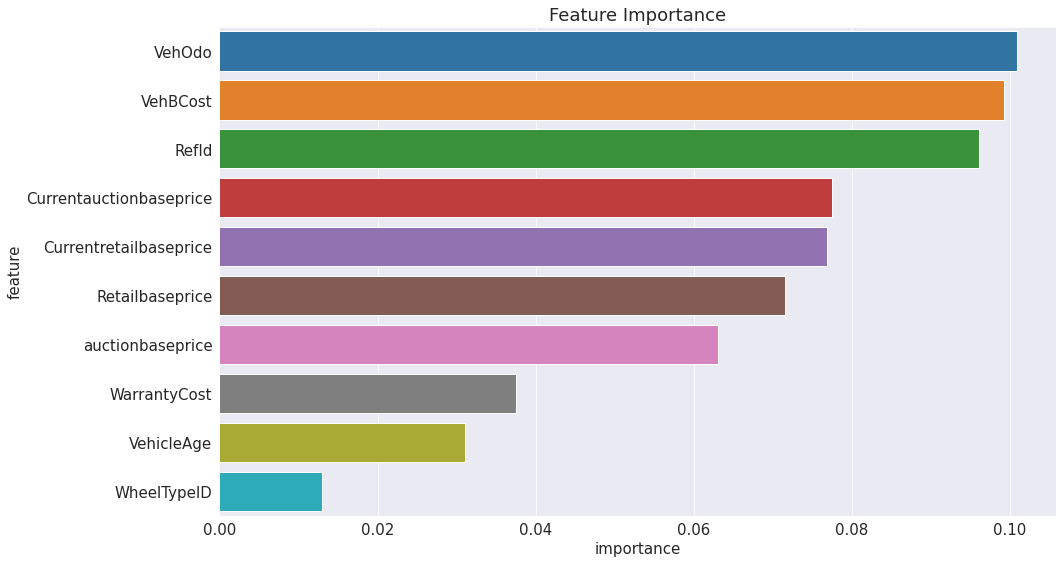

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=relevance_df.head(10), x='importance', y='feature');

In [ ]:
relevance_df.head(20)

feature  importance
3                 WheelTypeID    0.141882
0                       RefId    0.097438
4                      VehOdo    0.082893
5                    VehBCost    0.076044
11     Currentretailbaseprice    0.062055
9             Retailbaseprice    0.056212
10    Currentauctionbaseprice    0.055686
8            auctionbaseprice    0.054290
7                WarrantyCost    0.034969
2                  VehicleAge    0.028527
13            Auction_MANHEIM    0.024880
1136                  VNST_TX    0.008923
1108                  VNST_CO    0.007318
1                     VehYear    0.007139
1109                  VNST_FL    0.006711
1106                  VNST_AZ    0.005637
1134                  VNST_SC    0.005436
1123                  VNST_NC    0.005249
1107                  VNST_CA    0.004991
755          Model_PT CRUISER    0.003801

LOOKING AT THE FEATURE IMPORTANCE, IT SEEMS THAT THE THE VEHODO METER SEEMS TO BE OF GREAT IMPOTANCE IN DEDISING WHETHER A VEHICLE MIGHT BE KICKED OR NOT. ALSO, THE INTRDUCTION OF THE  NEW COLUMNS IN THE BASE PRICES, WAS IMPORTANNT AS WELL. THIS WILL SERVE AS A BASED LINE FOR THE PRICE OF A CAR INDICATING WHETHER THE PRICE IS HIGH FOR FOR A PARTICLUAR BRAND OF CAR. 

 # Hyperparameter Tuning and Overfitting

 > This will be done in order to reduce overfitting, because from the accuraccy of the train data set, we got a 100 percent which simply means that the model have learn/ memorized the data over and over. while with the validation data set, an accuracy of 80 percent which gotten. this simply shows that the model perform poorly on thee validation set, due to new set of data.

 

In [ ]:
?DecisionTreeClassifier

#max_depth

> looking for the best max_depth to get a reasonable amount of accuracy.

In [ ]:
model_1 = DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.9041191825300822

In [ ]:
model_1.score(X_val, val_targets)

0.9010170462684429

MAX_LEAF_NODES

In [ ]:
model_1 = DecisionTreeClassifier(max_leaf_nodes=100, random_state=42)

In [ ]:
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=100, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.9030661957249863

In [ ]:
model_1.score(X_val, val_targets)

0.9061515276065214

> After series of find the maximum max_leaf_nodes, a value of 0.8991 was gotten for a 50 max_leaf_nodes and 0.8994 was obtained for a 50 max_leaf_nodes. From the values, there seems to be no much change in validation percentage compared to the difference in the max_leaf_nodes  from 100 to 50. So preferly, 100 max_leaf_nodes will be the optimum.

MAX_FEATURES

In [ ]:

model_1 = DecisionTreeClassifier(max_features= "log2", random_state=42)

In [ ]:
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(max_features='log2', random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

1.0

In [ ]:
model_1.score(X_val, val_targets)

0.8096999588984792

In [ ]:
model_1 = DecisionTreeClassifier(max_features= "sqrt", random_state=42)
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(max_features='sqrt', random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

1.0

In [ ]:
model_1.score(X_val, val_targets)

0.828821085804326

In [ ]:
model_1 = DecisionTreeClassifier(max_features= 5, random_state=42)
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(max_features=5, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)


1.0

In [ ]:
model_1.score(X_val, val_targets)

0.8298238074774388

> WOW!!!, after much turning of the value of max_features to reduced over fitting, it absolutly had no much effect in the percentage values for both the val and train set.


> THIS SHOWS THAT MAX_FEATURES DOSEN'T HAVE MUCH EFFECT ON THIS SET OF DATA AND SO IT CAN BE IGNORED.

MIN_SAMPLES_SPLIT

In [ ]:
model_1 = DecisionTreeClassifier(min_samples_split=10, random_state=42)

In [ ]:
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(min_samples_split=10, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.9566753676704653

In [ ]:
model_1.score(X_val, val_targets)

0.8498782409396934

> The min_sample_split seems to have an effect but not as much. Considering the value of split assigned to the change it implemented, this hyperparameter might not be considered as very important parameter.   

MIN_SAMPLES_LEAF

In [ ]:
model_1 = DecisionTreeClassifier(min_samples_leaf=2, random_state=42)

In [ ]:
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(min_samples_leaf=2, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.9665754122365824

In [ ]:
model_1.score(X_val, val_targets)

0.8504512247529007

In [ ]:
model_1 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.9382281785191317

In [ ]:
model_1.score(X_val, val_targets)

0.8624838848302535

In [ ]:
model_1 = DecisionTreeClassifier(min_samples_leaf=12, random_state=42)
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(min_samples_leaf=12, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.9106926847902209

In [ ]:
model_1.score(X_val, val_targets)

0.8833977940123191

In [ ]:
model_1 = DecisionTreeClassifier(min_samples_leaf=15, random_state=42)
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(min_samples_leaf=15, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.9062785457645698

In [ ]:
model_1.score(X_val, val_targets)

0.8894369091656391

> The min_samples_leaf parameter have a great siginficant for the val test set. the was an incerment from 0.826 to 0.887 i.e a 0.5% increment with a min_samples_leaf of 15. 

MIN_WEIGHT_FRACTION_LEAF

In [ ]:
model_1 = DecisionTreeClassifier(min_weight_fraction_leaf=0.5, random_state=42)

In [ ]:
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(min_weight_fraction_leaf=0.5, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.8760428719322818

In [ ]:
model_1.score(X_val, val_targets)

0.885737772297575

MIN_IMPURITY_SPLIT

In [ ]:
model_1 = DecisionTreeClassifier(min_impurity_split=0.2, random_state=42)

In [ ]:
model_1.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:321: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.



DecisionTreeClassifier(min_impurity_split=0.2, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.9037531037117209

In [ ]:
model_1.score(X_val, val_targets)

0.9008738003151411

MIN_IMPURITY_DECREASE

In [ ]:
model_1 = DecisionTreeClassifier(min_impurity_decrease= 0.5, random_state=42)

In [ ]:
model_1.fit(X_train, train_targets)

DecisionTreeClassifier(min_impurity_decrease=0.5, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.9037531037117209

In [ ]:
model_1.score(X_val, val_targets)

0.9008738003151411

#Combining all hyperparameter together

> After series of hypertuning to reduce overfitting. below is the best hyperparameter obtained for this set of data.

In [ ]:
model_1 = DecisionTreeClassifier(min_impurity_decrease= 0.5, 
                                 min_impurity_split= 0.2, 
                                 min_weight_fraction_leaf= 0.5,
                                 max_leaf_nodes=100,
                                 max_depth= 4,
                                 min_samples_split=10,
                                 min_samples_leaf=12,
                                 random_state=42)

In [ ]:
model_1.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:321: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.



DecisionTreeClassifier(max_depth=4, max_leaf_nodes=100,
                       min_impurity_decrease=0.5, min_impurity_split=0.2,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.5, random_state=42)

In [ ]:
model_1.score(X_train, train_targets)

0.9037531037117209

In [ ]:
model_1.score(X_val, val_targets)

0.9008738003151411

In [ ]:
test_preds = model_1.predict(X_test)

In [ ]:
test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model_1.score(X_test, test_preds)

1.0

THIS MODEL PERFORMS REALLY WELL ON THIS DATA SET.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/obasidanchi01/course-project


'https://jovian.ai/obasidanchi01/course-project'

#GRADIENT BOOSTING 



In [ ]:
from xgboost import XGBClassifier

In [ ]:
?XGBClassifier

In [ ]:
model_2 = XGBClassifier(random_state=42)

In [ ]:
model_2.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:12:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model_2.score(X_train, train_targets)

0.9090692048131407

In [ ]:
model_2.score(X_val, val_targets)

0.8990116029222175

Using the gradient boost model, it seems it actually performs better than decision tree model. 

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_2.feature_importances_
}).sort_values('importance', ascending=False)

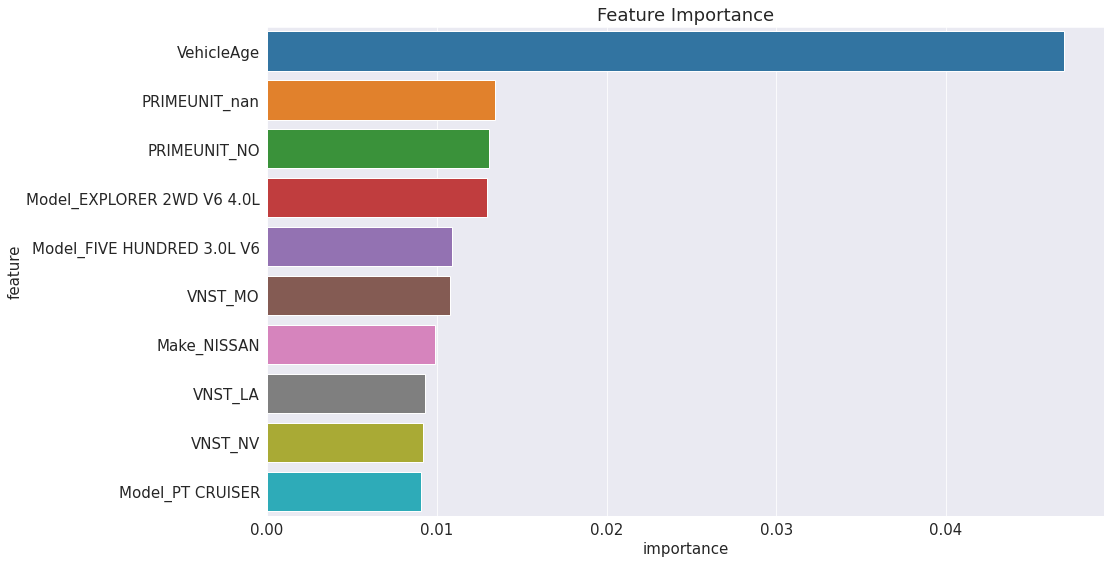

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
importance_df.head(10)

feature  importance
2                     VehicleAge    0.046951
1094               PRIMEUNIT_nan    0.013439
1092                PRIMEUNIT_NO    0.013087
376   Model_EXPLORER 2WD V6 4.0L    0.012961
401   Model_FIVE HUNDRED 3.0L V6    0.010918
1112                     VNST_MO    0.010791
36                   Make_NISSAN    0.009888
1107                     VNST_LA    0.009300
1119                     VNST_NV    0.009191
747             Model_PT CRUISER    0.009098

Wow, this is realy interesting. after modeliing with Xgbosst, this pretty shows that the Vechicle Age is very importance and the most important parameter to check out for if there will be a sale or not. This is sound so correct because, if a vehicle is too old, the buyer might not want to make a purchase. This is because he might be checking out the engine capacity, the tyres, colour quality, and many more.  

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/obasidanchi01/course-project


'https://jovian.ai/obasidanchi01/course-project'

#HYPERTUNING AND REGULARIZATION.
>From the the above score, it seems  there was no pretty much differnce in the train and val set. But a further tuning of the hyperparameter can still be of help in imporving the val score.  

Max_depth

In [ ]:
model_2 = XGBClassifier(max_depth=4, random_state=42)

In [ ]:
model_2.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:29:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model_2.score(X_train, train_targets)

0.9016046525790147

In [ ]:
model_2.score(X_val, val_targets)

0.9045074667762707

there seems to be an improvement in the validation score to 90 percent.

n_estimators

In [ ]:
model_2 = XGBClassifier(n_estimators=4, random_state=42)

In [ ]:
model_2.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:32:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=4, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model_2.score(X_train, train_targets)

0.90034102673406

In [ ]:
model_2.score(X_val, val_targets)

0.905055487053021

gamma hyperparameter

In [ ]:
model_2 = XGBClassifier(  gamma= 0.01, random_state=42)

In [ ]:
model_2.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:33:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model_2.score(X_train, train_targets)

0.9078314353571646

In [ ]:
model_2.score(X_val, val_targets)

0.9051924921222085

In [ ]:
model_2 = XGBClassifier(colsample_bytree=0.5, random_state=42)

In [ ]:
model_2.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:37:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model_2.score(X_train, train_targets)

0.9066591559588332

In [ ]:
model_2.score(X_val, val_targets)

0.9064255377448965

In [ ]:
model_2 = XGBClassifier(booster="gbtree", random_state=42)

In [ ]:
model_2.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:39:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model_2.score(X_train, train_targets)

0.9078314353571646

In [ ]:
model_2.score(X_val, val_targets)

0.9051924921222085

In [ ]:
model_2 = XGBClassifier(learning_rate= 0.01, random_state=42)

In [ ]:
model_2.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:43:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model_2.score(X_train, train_targets)

0.899686377199927

In [ ]:
model_2.score(X_val, val_targets)

0.9046444718454583

In [ ]:
model_2 = XGBClassifier(  n_jobs =1, random_state=42)

In [ ]:
model_2.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:47:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model_2.score(X_train, train_targets)

0.9090692048131407

In [ ]:
model_2.score(X_val, val_targets)

0.8990116029222175

>After much hyperparameter tuning, there was improvement on the model for better accuracy score. so, as such some hyperparameter was that very effective.

#Rapping all hyperparameter together

In [ ]:
model_2 = XGBClassifier(learning_rate= 0.01, 
                        n_estimators= 4,
                        booster= "gbtree",
                        n_jobs= 1,
                        max_depth= 4,
                        colsample_bytree=0.5 ,gamma=0.01,
                        random_state=42)

In [ ]:
model_2.fit(X_train, train_targets)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:39:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=4, n_jobs=1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model_2.score(X_train, train_targets)

0.8855276779733269

In [ ]:
model_2.score(X_val, val_targets)

0.8942320865872038

In [ ]:
test_preds_2= model_2.predict(X_test)

In [ ]:
print([test_preds_2])

[array([0, 0, 0, ..., 0, 0, 0])]


#DECISION ON THE BEST MODEL
> FROM THE TWO MODEL USED, A BEAUTIFUL AND REASONABLE PERFORMANCE WAS OBTAINED FOR BOTH ON THE VALIDATION SET AND ALSO THE TEST SET. THIS SIMPLY SHOWS THAT BOTH MODEL CAN BE USED IN THIS SET OF DATA. BUT LOOKING AT THE DECISION TREE MODEL, THE FEATURE IMPORTANCE WAS THE VEHODOMETER, AND WHICH IS REASONABLE BECAUSE THIS DEPLICIT THE AMOUNT OF DISTANCE THE VEHICLE HAS COVERED SINCE MANUFACTURED.

> WHILE THAT OF THE GRADIENT BOOSTING, IT GAVE THE VEHICLE AGE AS THE MOST FEATURE IMPORTANCE. THIS MODEL DECISION IS ALSO VERY USEFUL AS THIS SIGNIFIES THE TIME SPENT THE VEHICLE HAS BEEN PURCHASED AFTER MANUFACTURING. THOUGH THIS MODEL MAY SINCE GOOD, BUT SOME DEFFECTS MIGHT STILL OCCUR, JUST AS A VECHILE MIGHT HAVE SPENT A LONGER TIME AFTER PURCHSE, BUT STILL BE IN A GOOD CONDITION( MIGHT NOT BEEN DRIVEN FOR A VERY LONG DISTANCE, ENGINE, COLOUR, TYRES, AND OTHER COMPONENT OF THE CAR CAN STILL BE IN GOOD CONDITIONS) 


> SO, SOME MORE EXTENSIVE WORK CAN BE DONE ON THIS DATA SET ON FEATURE ENGINEERING, THE USED OF SOME SPECIFIC COLUMNS, AND MANY MORE. ALSO OTHER MODEL CAN BE TIRED OUT ON THIS DATA SET. 

> IN CONCLUSION, I WOULD PREFER THAT BOTH MODEL SHOULD BE USED IN DECSIDING IF IT IS AA BADSALE OR NOT. 


> CHECK OUT SOME THIS NOTE BOOK FOR SOME INSIGHFUL UNDERSTANDING
https://jovian.ai/obasidanchi01/python-gradient-boosting-machines.


THE LINK BELOW, IS AN OVERVIEW OF AUCTION CARS IN THE UNITED STATE. THIS CAN GIVE YOU AN INSIGHT OF HOW IT LOOKS LIKE. 
https://www.googleadservices.com/pagead/aclk?sa=L&ai=DChcSEwiN85_quJTyAhWF6VEKHbWED2wYABADGgJ3cw&ae=2&ohost=www.google.com&cid=CAESQOD2IzIpjF0Vm-mnbmLVH-tOcOzAhORG0Pv_CMm56Ry-k6WbU6gvaQ9DGKh7rd9iroEhFjxHzSMacuZWxd-m2qk&sig=AOD64_2DjfqJETimmj6Ka-5kjVkE3OkyUQ&q&adurl&ved=2ahUKEwjgmJbquJTyAhXB7eAKHWwwDpAQ0Qx6BAgGEAE.




In [ ]:
submission_df['Sales']  = test_preds_2


In [ ]:
submission_df

RefId  IsBadBuy
0       73015         0
1       73016         0
2       73017         0
3       73018         0
4       73019         0
...       ...       ...
48702  121742         0
48703  121743         0
48704  121744         0
48705  121745         0
48706  121746         0

[48707 rows x 2 columns]

In [ ]:
submission_df.to_csv('submission.csv', index=None)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/obasidanchi01/course-project


'https://jovian.ai/obasidanchi01/course-project'